In [32]:
from tensorflow import keras

testing_set = keras.preprocessing.image_dataset_from_directory(
	'../../input/images/training_testing/random-5500-0.8/testing/',
	'../../input/images/training_testing/random-5500-0.8/training/',
	# subset="validation",
	# seed=123, #TODO: understand this arg
	image_size=(224, 224),
	label_mode='categorical',
	batch_size=1,
)

Found 2832 files belonging to 2 classes.


In [33]:
whale_present = 0
whale_not_present = 0
for image, label in testing_set:
	if label.numpy()[0][0] == 0: # whale present
		whale_not_present += 1
	else:
		whale_present += 1

print(testing_set.class_names)
print(f'whale_present: {whale_present}')
print(f'whale_not_present: {whale_not_present}')

['no whale', 'whale present']
whale_present: 1422
whale_not_present: 1410


In [52]:
custom_model = keras.models.load_model('resnet50_epochs5_samples5500_seed123_noweights.h5')
# custom_model = keras.models.load_model('resnet50_epochs2_samples5500_seed123.h5')
# custom_model = keras.models.load_model('resnet50_epochs2_samples5500_seed123.h5')
custom_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 23538690 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [53]:
y_pred_raw = custom_model.predict(testing_set)
y_pred = [1 if y[0] < 0.5 else 0 for y in y_pred_raw]
y_true = [label.numpy()[0][0] for _, label in testing_set]


2832/2832 [==============================] - 114s 40ms/step


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm


array([[753, 657],
       [830, 592]])

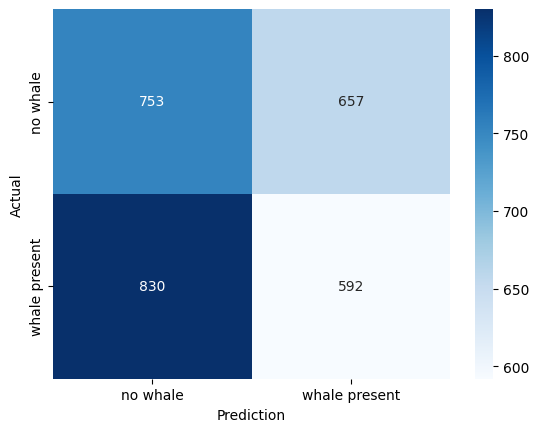

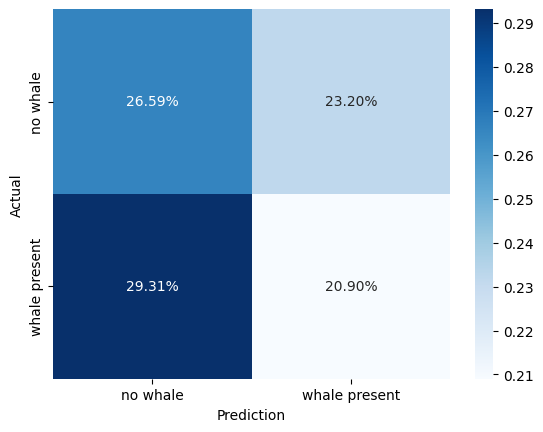

In [55]:
# Generate Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(
	cf_matrix, 
	annot=True,
	fmt='d',
	xticklabels=testing_set.class_names,
	yticklabels=testing_set.class_names,
	cmap='Blues'
).set(
	xlabel='Prediction',
	ylabel='Actual'
)
plt.show()

sns.heatmap(
	cf_matrix/np.sum(cf_matrix), 
	annot=True,
	fmt='.2%',
	xticklabels=testing_set.class_names,
	yticklabels=testing_set.class_names,
	cmap='Blues'
).set(
	xlabel='Prediction',
	ylabel='Actual'
)
plt.show()
